In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
import tensorflow.keras.utils as ku 
import numpy as np 
import pandas as pd
import string
import tensorflow as tf

In [ ]:
df = pd.read_csv('drive/MyDrive/datasets/documents.csv')

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
new = df["deep_learning"][0:50].str.split("]", n = 1, expand = True)
deep_learning_text = new[0]
deep_learning_text = deep_learning_text.dropna()
deep_learning_text = deep_learning_text.apply(remove_punctuations)
deep_learning_title = new[1]
deep_learning_title = deep_learning_title.dropna()
deep_learning_title = deep_learning_title.apply(remove_punctuations)

new = df["covid_19"][0:50].str.split("]", n = 1, expand = True)
covid_19_text = new[0]
covid_19_text = covid_19_text.dropna()
covid_19_text = covid_19_text.apply(remove_punctuations)
covid_19_title = new[1]
covid_19_title = covid_19_title.dropna()
covid_19_title = covid_19_title.apply(remove_punctuations)

new = df["human_connectome"][0:50].str.split("]", n = 1, expand = True)
human_connectome_text = new[0]
human_connectome_text = human_connectome_text.dropna()
human_connectome_text = human_connectome_text.apply(remove_punctuations)
human_connectome_title = new[1]
human_connectome_title = human_connectome_title.dropna()
human_connectome_title = human_connectome_title.apply(remove_punctuations)

new = df["virtual_reality"][0:50].str.split("]", n = 1, expand = True)
virtual_reality_text = new[0]
virtual_reality_text = virtual_reality_text.dropna()
virtual_reality_text = virtual_reality_text.apply(remove_punctuations)
virtual_reality_title = new[1]
virtual_reality_title = virtual_reality_title.dropna()
virtual_reality_title = virtual_reality_title.apply(remove_punctuations)

new = df["brain_machine_interfaces"][0:100].str.split("]", n = 1, expand = True)
brain_machine_interfaces_text = new[0]
brain_machine_interfaces_text = brain_machine_interfaces_text.dropna()
brain_machine_interfaces_text = brain_machine_interfaces_text.apply(remove_punctuations)
brain_machine_interfaces_title = new[1]
brain_machine_interfaces_title = brain_machine_interfaces_title.dropna()
brain_machine_interfaces_title = brain_machine_interfaces_title.apply(remove_punctuations)

new = df["electroactive_polymers"][0:100].str.split("]", n = 1, expand = True)
electroactive_polymers_text = new[0]
electroactive_polymers_text = electroactive_polymers_text.dropna()
electroactive_polymers_text = electroactive_polymers_text.apply(remove_punctuations)
electroactive_polymers_title = new[1]
electroactive_polymers_title = electroactive_polymers_title.dropna()
electroactive_polymers_title = electroactive_polymers_title.apply(remove_punctuations)

new = df["pedot_electrodes"][0:50].str.split("]", n = 1, expand = True)
pedot_electrodes_text = new[0]
pedot_electrodes_text = pedot_electrodes_text.dropna()
pedot_electrodes_text = pedot_electrodes_text.apply(remove_punctuations)
pedot_electrodes_title = new[1]
pedot_electrodes_title = pedot_electrodes_title.dropna()
pedot_electrodes_title = pedot_electrodes_title.apply(remove_punctuations)
new = df["neuroprosthetics"][0:50].str.split("]", n = 1, expand = True)
neuroprosthetics_text = new[0]
neuroprosthetics_text = neuroprosthetics_text.dropna()
neuroprosthetics_text = neuroprosthetics_text.apply(remove_punctuations)
neuroprosthetics_title = new[1]
neuroprosthetics_title = neuroprosthetics_title.dropna()
neuroprosthetics_title = neuroprosthetics_title.apply(remove_punctuations)

In [ ]:
text = pd.concat([deep_learning_text, 
                  covid_19_text, 
                  human_connectome_text, 
                  virtual_reality_text, 
                  brain_machine_interfaces_text, 
                  electroactive_polymers_text, 
                  pedot_electrodes_text, 
                  neuroprosthetics_text], axis = 0)
title = pd.concat([deep_learning_title, 
                  covid_19_title, 
                  human_connectome_title, 
                  virtual_reality_title, 
                  brain_machine_interfaces_title, 
                  electroactive_polymers_title, 
                  pedot_electrodes_title, 
                  neuroprosthetics_title], axis = 0)
combined = pd.concat([text, title], axis = 0)

In [ ]:
text = np.array(text).astype(str)
title = np.array(title).astype(str)
combined = np.array(combined).astype(str)

In [ ]:
np.random.shuffle(text)
np.random.shuffle(title)
np.random.shuffle(combined)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined)
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_text_sequences = []
for line in text:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_text_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_text_sequences])
input_text_sequences = np.array(pad_sequences(input_text_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_text_sequences[:,:-1],input_text_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(512, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 455, 50)           518500    
_________________________________________________________________
bidirectional (Bidirectional (None, 455, 100)          40400     
_________________________________________________________________
dropout (Dropout)            (None, 455, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 10370)             5319810   
Total params: 5,990,822
Trainable params: 5,990,822
Non-trainable params: 0
______________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor = 'loss', save_best_only = True, filepath = 'Text_Prediction.hdf5')

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[callback, checkpoint])

Epoch 1/100
2359/2359 [==============================] - 175s 70ms/step - loss: 7.2402 - accuracy: 0.0726
Epoch 2/100
2359/2359 [==============================] - 162s 69ms/step - loss: 6.7162 - accuracy: 0.1034
Epoch 3/100
2359/2359 [==============================] - 162s 69ms/step - loss: 6.2857 - accuracy: 0.1255
Epoch 4/100
2359/2359 [==============================] - 162s 69ms/step - loss: 5.9200 - accuracy: 0.1408
Epoch 5/100
2359/2359 [==============================] - 162s 69ms/step - loss: 5.6068 - accuracy: 0.1526
Epoch 6/100
2359/2359 [==============================] - 162s 69ms/step - loss: 5.3280 - accuracy: 0.1647
Epoch 7/100
2359/2359 [==============================] - 165s 70ms/step - loss: 5.0583 - accuracy: 0.1736
Epoch 8/100
2359/2359 [==============================] - 164s 69ms/step - loss: 4.8054 - accuracy: 0.1845
Epoch 9/100
2359/2359 [==============================] - 166s 70ms/step - loss: 4.5611 - accuracy: 0.1966
Epoch 10/100
2359/2359 [======================

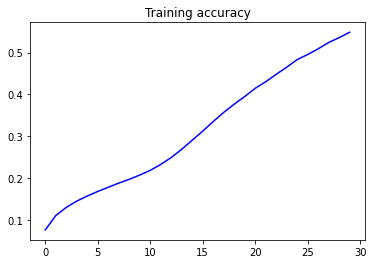

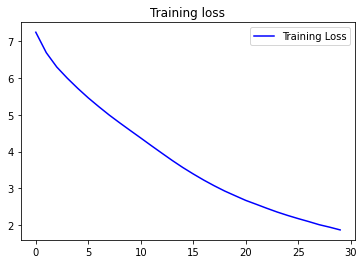

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
model.save('model50.hd5')

In [ ]:
seed_text = "The severe acute respiratory syndrome-coronavirus-2 outbreak has rapidly reached pandemic proportions and has become a major threat to global health"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

In [ ]:
!cp -r model50.hd5 /content/drive/MyDrive/models